# **Combining Data**

Combining data atau menggabungkan data dari beberapa dataframe, beberapa function dasar dari pandas yang dapat kita pakai untuk menggabungkan data adalah:

- merge()
- join()
- concat()

In [1]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("penguins_size.csv")

## Merge

Function merge digunakan untuk menggabungkan data pada Columns atau indices yang sama

In [42]:
data1 = data.sample(n=40, random_state=30)
data1["cummulative"] = data['flipper_length_mm']/data['culmen_depth_mm']
data2 = data.sample(n=20, random_state=80)

In [43]:
print(f"Data 1 Shape = {data1.shape}")
print(f"Data 2 Shape = {data2.shape}")

Data 1 Shape = (40, 8)
Data 2 Shape = (20, 7)


### *Inner Join*

Inner join merupakan penggabungan dataframe dimana key atau indices dimiliki oleh kedua dataframenya dan menganulir yang tidak sama


In [44]:
inner_merge = pd.merge(data1, data2)

In [45]:
inner_merge

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cummulative
0,Adelie,Biscoe,35.9,19.2,189.0,3800.0,FEMALE,9.843750
1,Adelie,Biscoe,35.7,16.9,185.0,3150.0,FEMALE,10.946746
2,Adelie,Biscoe,42.0,19.5,200.0,4050.0,MALE,10.256410


In [46]:
inner_merge.shape

(3, 8)

Dengan menggunakan merge kita juga dapat menggabungkan seluruh dataset tetapi hanya spesifik kolom seperti disini species dan island

In [47]:
inner_merged_total = pd.merge(data1, data2, on= ['species','island'])

In [48]:
inner_merged_total

,species,island,culmen_length_mm_x,culmen_depth_mm_x,flipper_length_mm_x,body_mass_g_x,sex_x,cummulative,culmen_length_mm_y,culmen_depth_mm_y,flipper_length_mm_y,body_mass_g_y,sex_y
0,Chinstrap,Dream,45.5,17.0,196.0,3500.0,FEMALE,11.529412,49.7,18.6,195.0,3600.0,MALE
1,Chinstrap,Dream,45.5,17.0,196.0,3500.0,FEMALE,11.529412,53.5,19.9,205.0,4500.0,MALE
2,Chinstrap,Dream,45.5,17.0,196.0,3500.0,FEMALE,11.529412,50.0,19.5,196.0,3900.0,MALE
3,Chinstrap,Dream,45.5,17.0,196.0,3500.0,FEMALE,11.529412,47.0,17.3,185.0,3700.0,FEMALE
4,Chinstrap,Dream,46.1,18.2,178.0,3250.0,FEMALE,9.780220,49.7,18.6,195.0,3600.0,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Adelie,Biscoe,42.0,19.5,200.0,4050.0,MALE,10.256410,43.2,19.0,197.0,4775.0,MALE
202,Adelie,Biscoe,42.0,19.5,200.0,4050.0,MALE,10.256410,38.2,18.1,185.0,3950.0,MALE
203,Adelie,Biscoe,42.0,19.5,200.0,4050.0,MALE,10.256410,35.9,19.2,189.0,3800.0,FEMALE
204,Adelie,Dream,36.8,18.5,193.0,3500.0,FEMALE,10.432432,36.3,19.5,190.0,3800.0,MALE


### *Outer Join*

Outer join merupakan penggabungan semua *rows* atau baris ang tidak memiliki pasangan di kedua dataframe, jika *rows* tidak memiliki pasangan, di dataframe yang ingin digabungkan berdasarkan key column, maka kita tidak akan kehilangan baris seperti pada inner join, maka row akan ada pada merged dataframe dengan NaN values

In [58]:
Outer_merged = pd.merge(data1, data2, how="outer", on= ['species','island'])

In [59]:
Outer_merged

,species,island,culmen_length_mm_x,culmen_depth_mm_x,flipper_length_mm_x,body_mass_g_x,sex_x,cummulative,culmen_length_mm_y,culmen_depth_mm_y,flipper_length_mm_y,body_mass_g_y,sex_y
0,Chinstrap,Dream,45.5,17.0,196.0,3500.0,FEMALE,11.529412,49.7,18.6,195.0,3600.0,MALE
1,Chinstrap,Dream,45.5,17.0,196.0,3500.0,FEMALE,11.529412,53.5,19.9,205.0,4500.0,MALE
2,Chinstrap,Dream,45.5,17.0,196.0,3500.0,FEMALE,11.529412,50.0,19.5,196.0,3900.0,MALE
3,Chinstrap,Dream,45.5,17.0,196.0,3500.0,FEMALE,11.529412,47.0,17.3,185.0,3700.0,FEMALE
4,Chinstrap,Dream,46.1,18.2,178.0,3250.0,FEMALE,9.780220,49.7,18.6,195.0,3600.0,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Adelie,Biscoe,42.0,19.5,200.0,4050.0,MALE,10.256410,43.2,19.0,197.0,4775.0,MALE
202,Adelie,Biscoe,42.0,19.5,200.0,4050.0,MALE,10.256410,38.2,18.1,185.0,3950.0,MALE
203,Adelie,Biscoe,42.0,19.5,200.0,4050.0,MALE,10.256410,35.9,19.2,189.0,3800.0,FEMALE
204,Adelie,Dream,36.8,18.5,193.0,3500.0,FEMALE,10.432432,36.3,19.5,190.0,3800.0,MALE


### *Left Join*

Left join atau juga bisa disebut $Left Outer Join$ merupakan penggabungan dataframe dengan mempertahankan semua *rows* yang ada pada dataframe di kiri tetapi melihat match value dengan data yang ada di kanan

In [60]:
left_merged = pd.merge(data1, data2, how="left", on= ['species','island'])
left_merged.shape

(206, 13)

In [61]:
left_merged

,species,island,culmen_length_mm_x,culmen_depth_mm_x,flipper_length_mm_x,body_mass_g_x,sex_x,cummulative,culmen_length_mm_y,culmen_depth_mm_y,flipper_length_mm_y,body_mass_g_y,sex_y
0,Chinstrap,Dream,45.5,17.0,196.0,3500.0,FEMALE,11.529412,49.7,18.6,195.0,3600.0,MALE
1,Chinstrap,Dream,45.5,17.0,196.0,3500.0,FEMALE,11.529412,53.5,19.9,205.0,4500.0,MALE
2,Chinstrap,Dream,45.5,17.0,196.0,3500.0,FEMALE,11.529412,50.0,19.5,196.0,3900.0,MALE
3,Chinstrap,Dream,45.5,17.0,196.0,3500.0,FEMALE,11.529412,47.0,17.3,185.0,3700.0,FEMALE
4,Chinstrap,Dream,46.1,18.2,178.0,3250.0,FEMALE,9.780220,49.7,18.6,195.0,3600.0,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Adelie,Biscoe,42.0,19.5,200.0,4050.0,MALE,10.256410,42.0,19.5,200.0,4050.0,MALE
202,Adelie,Biscoe,42.0,19.5,200.0,4050.0,MALE,10.256410,35.7,16.9,185.0,3150.0,FEMALE
203,Adelie,Biscoe,42.0,19.5,200.0,4050.0,MALE,10.256410,43.2,19.0,197.0,4775.0,MALE
204,Adelie,Biscoe,42.0,19.5,200.0,4050.0,MALE,10.256410,38.2,18.1,185.0,3950.0,MALE


### *Right Join*

Right Outer join merupakan kebalikan dari left join dimana right outer join ini menggabungkan dataframe dengan mempertahankan value pada dataframe di kanan

In [62]:
right_merged = pd.merge(data1, data2, how="right", on= ['species','island'])
right_merged.shape

(206, 13)

In [63]:
right_merged

,species,island,culmen_length_mm_x,culmen_depth_mm_x,flipper_length_mm_x,body_mass_g_x,sex_x,cummulative,culmen_length_mm_y,culmen_depth_mm_y,flipper_length_mm_y,body_mass_g_y,sex_y
0,Gentoo,Biscoe,45.1,14.5,215.0,5000.0,FEMALE,14.827586,50.8,17.3,228.0,5600.0,MALE
1,Gentoo,Biscoe,45.5,13.7,214.0,4650.0,FEMALE,15.620438,50.8,17.3,228.0,5600.0,MALE
2,Gentoo,Biscoe,48.7,15.1,222.0,5350.0,MALE,14.701987,50.8,17.3,228.0,5600.0,MALE
3,Gentoo,Biscoe,53.4,15.8,219.0,5500.0,MALE,13.860759,50.8,17.3,228.0,5600.0,MALE
4,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,MALE,14.379085,50.8,17.3,228.0,5600.0,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Gentoo,Biscoe,44.9,13.8,212.0,4750.0,FEMALE,15.362319,44.5,14.3,216.0,4100.0,NaN
202,Gentoo,Biscoe,45.7,13.9,214.0,4400.0,FEMALE,15.395683,44.5,14.3,216.0,4100.0,NaN
203,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,MALE,14.539474,44.5,14.3,216.0,4100.0,NaN
204,Gentoo,Biscoe,47.8,15.0,215.0,5650.0,MALE,14.333333,44.5,14.3,216.0,4100.0,NaN


## Join

jika ingin menggabungkan columns seperti $merge()$ kita harus set the columns sebagai indices.

In [66]:
inner_merged_total = pd.merge(data1, data2, on= ['species','island'])
print(inner_merged_total.shape)

inner_joined_total = data1.join(data2.set_index(['species','island']), 
                    on=['species','island'],
                    how="inner",
                    lsuffix="_x",
                    rsuffix="_y")
print(inner_joined_total.shape)

(206, 13)
(206, 13)


## Concat

untuk menggabungkan rows ataupun columns

### Menggabungkan $Rows$

In [68]:
concatenated = pd.concat([data1, data2])
concatenated

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cummulative
195,Chinstrap,Dream,45.5,17.0,196.0,3500.0,FEMALE,11.529412
158,Chinstrap,Dream,46.1,18.2,178.0,3250.0,FEMALE,9.780220
241,Gentoo,Biscoe,45.1,14.5,215.0,5000.0,FEMALE,14.827586
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
106,Adelie,Biscoe,38.6,17.2,199.0,3750.0,FEMALE,11.569767
232,Gentoo,Biscoe,45.5,13.7,214.0,4650.0,FEMALE,15.620438
239,Gentoo,Biscoe,48.7,15.1,222.0,5350.0,MALE,14.701987
176,Chinstrap,Dream,46.7,17.9,195.0,3300.0,FEMALE,10.893855
74,Adelie,Torgersen,35.5,17.5,190.0,3700.0,FEMALE,10.857143
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE,9.009434


### Menggabungkan $Columns$

In [73]:
concatenated = pd.concat([data1, data2], axis="columns")
concatenated

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cummulative,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
195,Chinstrap,Dream,45.5,17.0,196.0,3500.0,FEMALE,11.529412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,Chinstrap,Dream,46.1,18.2,178.0,3250.0,FEMALE,9.780220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,Gentoo,Biscoe,45.1,14.5,215.0,5000.0,FEMALE,14.827586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,Adelie,Biscoe,38.6,17.2,199.0,3750.0,FEMALE,11.569767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,Gentoo,Biscoe,45.5,13.7,214.0,4650.0,FEMALE,15.620438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,Gentoo,Biscoe,48.7,15.1,222.0,5350.0,MALE,14.701987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,Chinstrap,Dream,46.7,17.9,195.0,3300.0,FEMALE,10.893855,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,Adelie,Torgersen,35.5,17.5,190.0,3700.0,FEMALE,10.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE,9.009434,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Visualization**

Data visualization mengubah kumpulan data menjadi hal lebih sederhana untuk ditampilkan.  

Dengan menggunakan elemen visual tersebut, pembaca akan lebih mudah memahami tren, outliers, dan pola dalam suatu data. 

Dalam bisnis, data visualization memungkinkan para pembuat keputusan untuk melihat analitik yang disajikan secara visual.

Dengan begitu, mereka dapat memahami konsep yang sulit atau mengidentifikasi pola baru. Hal ini akan membuat pengambilan keputusan menjadi lebih mudah dan tepat.

## Visualisasi Data dengan Python (Seaborn dan Matplotlib)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load data
data = pd.read_csv("penguins_size.csv")

In [6]:
data.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [12]:
#drop data yang NA
data.dropna(inplace=True)

In [13]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


### Line Plot

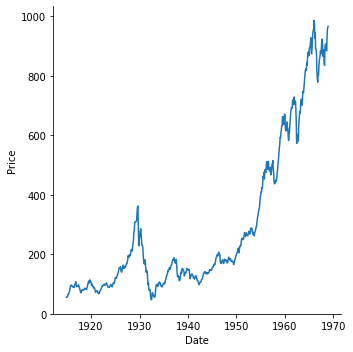

In [24]:
dowjones = sns.load_dataset("dowjones")
dowjones['Date'] = pd.to_datetime(dowjones['Date'], format = '%Y-%m-%d')
sns.relplot(data=dowjones, x="Date", y="Price", kind="line")

(Interpretasi)

### Barplot

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

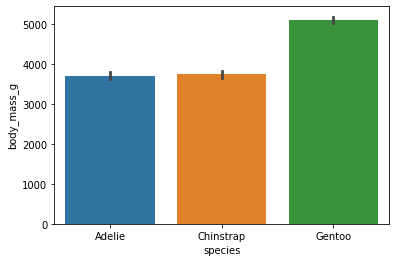

In [31]:
sns.barplot(x='species',y='body_mass_g',data=data)

(Interpretasi)

### Boxplot

<AxesSubplot:xlabel='species', ylabel='culmen_length_mm'>

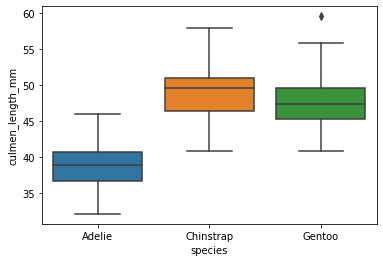

In [33]:
sns.boxplot(x="species",y="culmen_length_mm",data=data)

(Interpretasi)

### Pie Plot

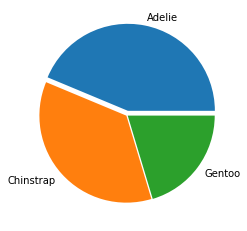

In [63]:
valpie = data.species.value_counts().values
labelpie = data.species.unique().tolist()
explode = [0.05,0.01,0.01]
plt.pie(valpie, labels=labelpie,explode=explode)
plt.show()

(Interpretasi)

### Violinplot

<AxesSubplot:xlabel='species', ylabel='culmen_depth_mm'>

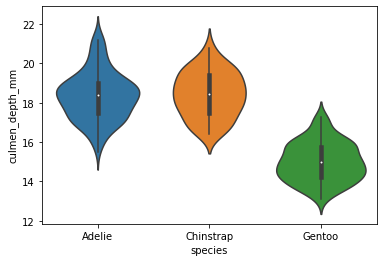

In [34]:
sns.violinplot(x="species",y="culmen_depth_mm",data=data)

(Interpretasi)

### Heatmap

In [35]:
data.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211
body_mass_g,0.589066,-0.472987,0.873211,1.000000


<AxesSubplot:>

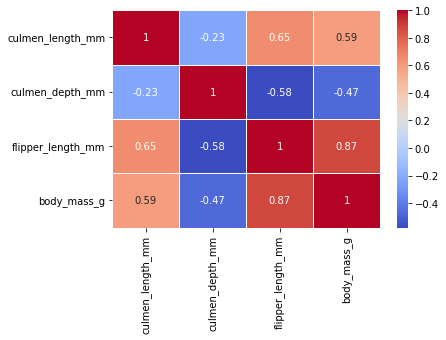

In [38]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True,linecolor='white',linewidths=1)

(Interpretasi)

### Distribution Plot

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='culmen_length_mm', ylabel='Density'>

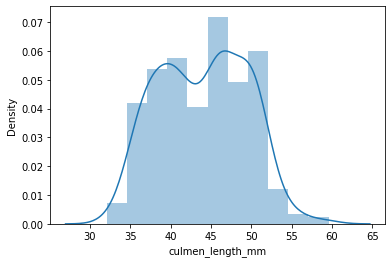

In [30]:
sns.distplot(data['culmen_length_mm'])

(Interpretasi)

### Joint Plot

jointplot() daapt digunakan untuk mencocokkan dua distplot untuk data bivariat.

Parameter 'kind' yang dapat digunakan yaitu:
- “scatter”
- “reg”
- “resid”
- “kde”
- “hex”

Dengan garis regresi

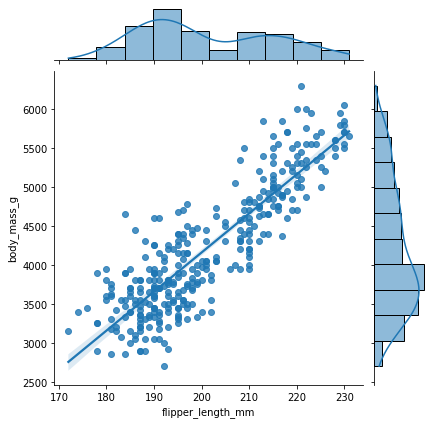

In [20]:
sns.jointplot(x='flipper_length_mm',y='body_mass_g',data = data,kind = 'reg')

(Interpretasi)

Tidak menggunakan garis regresi

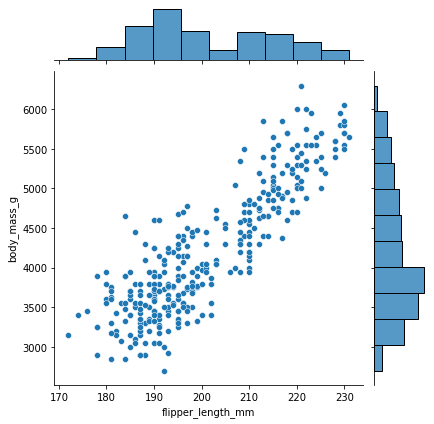

In [21]:
sns.jointplot(x='flipper_length_mm',y='body_mass_g',data = data,kind = 'scatter')

(Interpretasi)

### Pair Plot

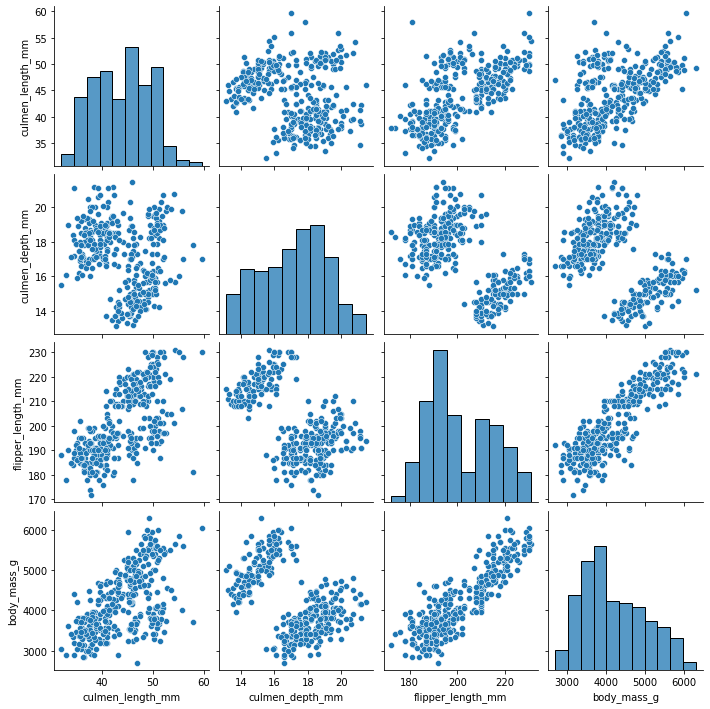

In [42]:
sns.pairplot(data)

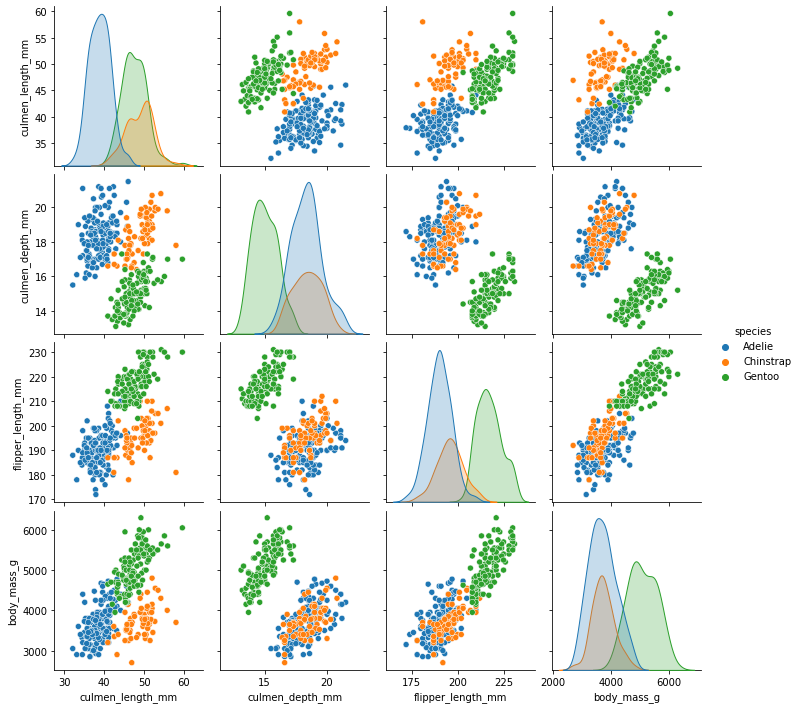

In [43]:
sns.pairplot(data,hue="species")

(Interpretasi)